In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
digits = load_digits()
X = digits.data
y = digits.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [3]:
pca_90 = PCA(n_components=0.90)
X_pca_90 = pca_90.fit_transform(X_scaled)

pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
X_pca_train, X_pca_test = train_test_split(X_pca_90, test_size=0.3, random_state=42, stratify=y)

In [4]:
svc_orig = SVC()
svc_orig.fit(X_train, y_train)
y_pred_orig = svc_orig.predict(X_test)

In [5]:
svc_pca = SVC()
svc_pca.fit(X_pca_train, y_train)
y_pred_pca = svc_pca.predict(X_pca_test)

In [6]:
acc_orig = accuracy_score(y_test, y_pred_orig)
acc_pca = accuracy_score(y_test, y_pred_pca)

print(f"Accuracy with original features: {acc_orig:.4f}")
print(f"Accuracy with PCA features: {acc_pca:.4f}")

Accuracy with original features: 0.9815
Accuracy with PCA features: 0.9815


Text(120.72222222222221, 0.5, 'Actual')

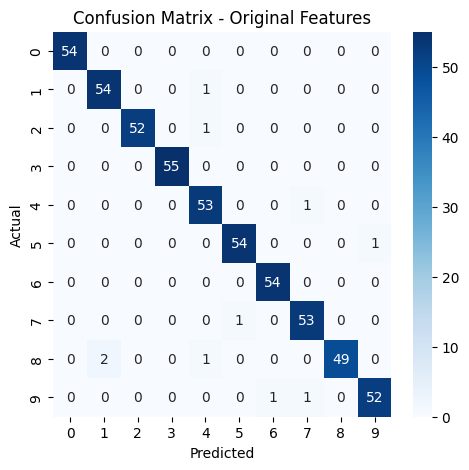

In [11]:
cm_orig = confusion_matrix(y_test, y_pred_orig)
cm_pca = confusion_matrix(y_test, y_pred_pca)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm_orig, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Original Features')
plt.xlabel('Predicted')
plt.ylabel('Actual')

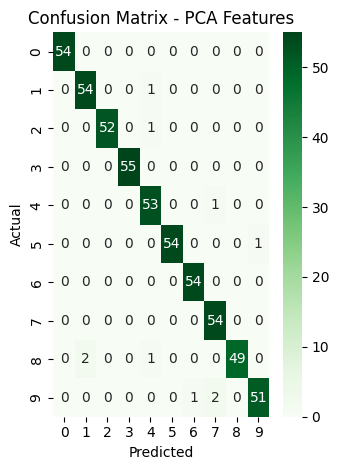

In [12]:
plt.subplot(1, 2, 2)
sns.heatmap(cm_pca, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - PCA Features')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

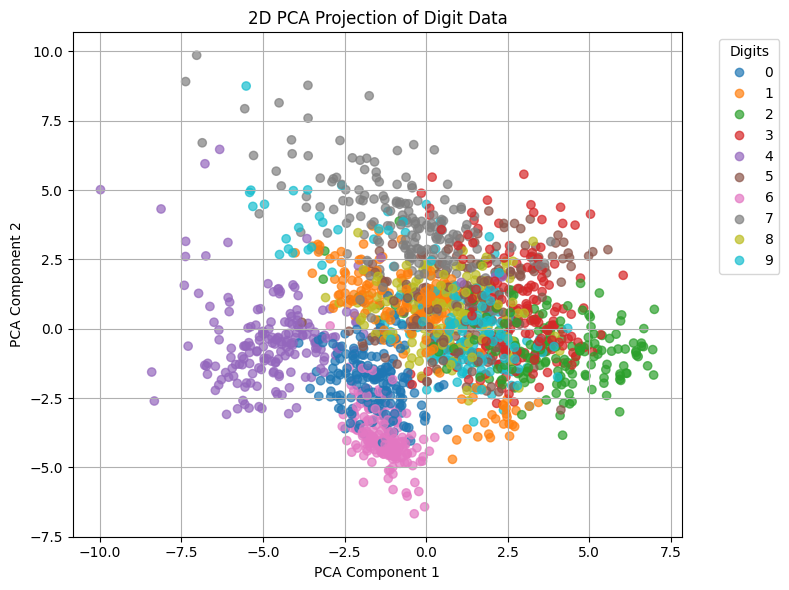

In [10]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='tab10', alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Digits", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('2D PCA Projection of Digit Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()